Final project

I'm really keen on the United States presidential election of 2016 and I choosed this theme as my final homework to finish this course./I had to ditch my original plan, because as you said it's not possible to get the total likes of a facebook page at a certain time./ I would like to analyze and compare Hillary Clinton's and Donald Trump's social media activity on Facebook. My hyphothesis is that the popularity of the two nominees on Facebook, measured with likes,comments,shares are different.So instead of the total likes of the page, I'm going to scrape the facebook posts of the two nominees, Clinton and Trump. Each posts have number of likes, number of comments, number of reactions and release date. These four dimension interest me, others won't matter in this analysis. To make the posts comparable I defined the time interval of the analysis. From the election of parties presidential nominees (presidential primary elections) to the presidential election. Donald Trump became the Republican Party's presidential nominee on July 19,2016. Hillary Clinton became the Democtaric Party's presidential nominee on July 26,2016. The presidential election was on 8th of November,2016. Observation of D.Trump facebook posts: July 19,2016 - November 8,2016.Observation of H.Clinton facebook posts: July 26,2016 - November 8,2016.
Source of the facebook scraper: By Max Woolf (@minimaxir)
https://github.com/minimaxir/facebook-page-post-scraper/blob/master/examples/how_to_build_facebook_scraper.ipynb

In [1]:
import urllib2
import json
import datetime
import csv
import time

In [45]:
# Let's see Trump's facebook posts firstly.

app_id = "**"
app_secret = "**" 
page_id = "DonaldTrump"

access_token = app_id + "|" + app_secret

In [16]:
# Let's write a quick program verify that the access_token works and the page_id is valid.
def testFacebookPageData(page_id, access_token):
    
    # construct the URL string
    base = "https://graph.facebook.com/v2.4"
    node = "/" + page_id
    parameters = "/?access_token=%s" % access_token
    url = base + node + parameters
    
    # retrieve data
    req = urllib2.Request(url)
    response = urllib2.urlopen(req)
    data = json.loads(response.read())
    
    print json.dumps(data, indent=4, sort_keys=True)
    

testFacebookPageData(page_id, access_token)

{
    "id": "153080620724", 
    "name": "Donald J. Trump"
}


In [17]:
# Helper function to catch the error and try again after a few seconds.
def request_until_succeed(url):
    req = urllib2.Request(url)
    success = False
    while success is False:
        try: 
            response = urllib2.urlopen(req)
            if response.getcode() == 200:
                success = True
        except Exception, e:
            print e
            time.sleep(5)
            
            print "Error for URL %s: %s" % (url, datetime.datetime.now())

    return response.read()

In [19]:
# The data is the Facebook Page metadata however; we need to change the endpoint to the /feed endpoint.

def testFacebookPageFeedData(page_id, access_token):
    
    # construct the URL string
    base = "https://graph.facebook.com/v2.4"
    node = "/" + page_id + "/feed" # changed
    parameters = "/?access_token=%s" % access_token
    url = base + node + parameters
    
    # retrieve data
    data = json.loads(request_until_succeed(url))
    
    print json.dumps(data, indent=4, sort_keys=True)
    

testFacebookPageFeedData(page_id, access_token)

{
    "data": [
        {
            "created_time": "2016-11-24T22:53:09+0000", 
            "id": "153080620724_10158181024740725", 
            "message": "\"Today, we give thanks for the many blessings in our lives: family, friends, freedom and faith. From our family to yours Happy Thanksgiving!\" \nVice President-elect Mike Pence"
        }, 
        {
            "created_time": "2016-11-24T20:47:13+0000", 
            "id": "153080620724_10158180470195725", 
            "message": "I am working hard, even on Thanksgiving, trying to get Carrier A.C. Company to stay in the U.S. (Indiana). MAKING PROGRESS - Will know soon!"
        }, 
        {
            "created_time": "2016-11-24T20:08:55+0000", 
            "id": "153080620724_10158180334240725", 
            "message": "It is my prayer, that on this Thanksgiving, we begin to heal our divisions and to move forward as one country strengthened by a shared purpose and very, very common resolve. -DJT"
        }, 
        {
     

In [20]:
# Function to mahe the csv utf-8
def unicode_normalize(text):
    return text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22,
                            0xa0:0x20 }).encode('utf-8')

In [21]:
# Gets the statuses
def getFacebookPageFeedData(page_id, access_token, num_statuses):
    
    # construct the URL string
    base = "https://graph.facebook.com"
    node = "/" + page_id + "/feed" 
    parameters = "/?fields=message,link,created_time,type,name,id,likes.limit(1).summary(true),comments.limit(1).summary(true),shares&limit=%s&access_token=%s" % (num_statuses, access_token) # changed
    url = base + node + parameters
    
    # retrieve data
    data = json.loads(request_until_succeed(url))
    
    return data
    

test_status = getFacebookPageFeedData(page_id, access_token, 1)["data"][0]
print json.dumps(test_status, indent=4, sort_keys=True)

{
    "comments": {
        "data": [
            {
                "created_time": "2016-11-24T22:54:00+0000", 
                "from": {
                    "id": "1214046152012815", 
                    "name": "Justin Slagal"
                }, 
                "id": "10158181024740725_10158181032385725", 
                "message": "Thank you for SAVING our great nation from the corrupt Clintons!! \ud83c\uddfa\ud83c\uddf8\ud83c\udf89\ud83d\udc4d\ud83c\udffb"
            }
        ], 
        "paging": {
            "cursors": {
                "after": "MzM0NQZDZD", 
                "before": "MzM0NQZDZD"
            }, 
            "next": "https://graph.facebook.com/v2.7/153080620724_10158181024740725/comments?access_token=1758550461071263%7C4927b068ca9e050008227d117ccf6d8e&summary=true&limit=1&after=MzM0NQZDZD"
        }, 
        "summary": {
            "can_comment": false, 
            "order": "ranked", 
            "total_count": 3345
        }
    }, 
    "created_time":

In [28]:
def getReactionsForStatus(status_id, access_token):


    base = "https://graph.facebook.com/v2.6"
    node = "/%s" % status_id
    reactions = "/?fields=" \
            "reactions.type(LIKE).limit(0).summary(total_count).as(like)" \
            ",reactions.type(LOVE).limit(0).summary(total_count).as(love)" \
            ",reactions.type(WOW).limit(0).summary(total_count).as(wow)" \
            ",reactions.type(HAHA).limit(0).summary(total_count).as(haha)" \
            ",reactions.type(SAD).limit(0).summary(total_count).as(sad)" \
            ",reactions.type(ANGRY).limit(0).summary(total_count).as(angry)"
    parameters = "&access_token=%s" % access_token
    url = base + node + reactions + parameters

    # retrieve data
    data = json.loads(request_until_succeed(url))

    return data

In [38]:
def processFacebookPageFeedStatus(status, access_token):

    # The status is now a Python dictionary, so for top-level items,
    # we can simply call the key.

    # Additionally, some items may not always exist,
    # so must check for existence first

    status_id = status['id']
    status_message = '' if 'message' not in status.keys() else \
            unicode_normalize(status['message'])
    link_name = '' if 'name' not in status.keys() else \
            unicode_normalize(status['name'])
    status_type = status['type']
    status_link = '' if 'link' not in status.keys() else \
            unicode_normalize(status['link'])

    # Time needs special care since a) it's in UTC and
    # b) it's not easy to use in statistical programs.

    status_published = datetime.datetime.strptime(
            status['created_time'],'%Y-%m-%dT%H:%M:%S+0000')
    status_published = status_published + \
            datetime.timedelta(hours=-5) # EST
    status_published = status_published.strftime(
            '%Y-%m-%d %H:%M:%S') # best time format for spreadsheet programs

    # Nested items require chaining dictionary keys.

    num_reactions = 0 if 'reactions' not in status else \
            status['reactions']['summary']['total_count']
    num_comments = 0 if 'comments' not in status else \
            status['comments']['summary']['total_count']
    num_shares = 0 if 'shares' not in status else status['shares']['count']

    # Counts of each reaction separately; good for sentiment
    # Only check for reactions if past date of implementation:
    # http://newsroom.fb.com/news/2016/02/reactions-now-available-globally/

    reactions = getReactionsForStatus(status_id, access_token) if \
            status_published > '2016-02-24 00:00:00' else {}

    num_likes = 0 if 'like' not in reactions else \
            reactions['like']['summary']['total_count']
    return (status_id, status_message, link_name, status_type, status_link,
            status_published, num_reactions, num_comments, num_shares,num_likes)


In [46]:
# This function query each page of Facebook Page Statuses (100 statuses per page),process all statuses and write it to a csv
# file until there is no more statuses left.
def scrapeFacebookPageFeedStatus(page_id, access_token):
    with open('%s_statusesfacebook.csv' % page_id, 'wb') as file:
        w = csv.writer(file)
        w.writerow([ 'status_id','status_message','link_name','status_type', 'status_link', 'status_published','num_reactions', 'num_comments', 
                    'num_shares', 'num_likes'])

        has_next_page = True
        num_processed = 0   # keep a count on how many we've processed
        scrape_starttime = datetime.datetime.now()

        print "Scraping %s Facebook Page: %s\n" % (page_id, scrape_starttime)

        statuses = getFacebookPageFeedData(page_id, access_token, 100)

        while has_next_page:
            for status in statuses['data']:

                # Ensure it is a status with the expected metadata
                if 'reactions' in status:
                    w.writerow(processFacebookPageFeedStatus(status,
                        access_token))

                # output progress occasionally to make sure code is not
                # stalling
                num_processed += 1
                if num_processed % 100 == 0:
                    print "%s Statuses Processed: %s" % \
                        (num_processed, datetime.datetime.now())

            # if there is no next page, we're done.
            if 'paging' in statuses.keys():
                statuses = json.loads(request_until_succeed(
                                        statuses['paging']['next']))
            else:
                has_next_page = False


        print "\nDone!\n%s Statuses Processed in %s" % \
                (num_processed, datetime.datetime.now() - scrape_starttime)


if __name__ == '__main__':
    scrapeFacebookPageFeedStatus(page_id, access_token)

Scraping DonaldTrump Facebook Page: 2016-11-25 09:13:58.791000

100 Statuses Processed: 2016-11-25 09:14:11.217000
200 Statuses Processed: 2016-11-25 09:14:24.846000
300 Statuses Processed: 2016-11-25 09:14:41.459000
400 Statuses Processed: 2016-11-25 09:14:54.825000
500 Statuses Processed: 2016-11-25 09:15:09.056000
600 Statuses Processed: 2016-11-25 09:15:23.431000
700 Statuses Processed: 2016-11-25 09:15:37.824000
800 Statuses Processed: 2016-11-25 09:15:57.303000
900 Statuses Processed: 2016-11-25 09:16:11.731000
1000 Statuses Processed: 2016-11-25 09:16:25.456000
1100 Statuses Processed: 2016-11-25 09:16:38.058000
1200 Statuses Processed: 2016-11-25 09:16:52.110000
1300 Statuses Processed: 2016-11-25 09:17:05.401000
1400 Statuses Processed: 2016-11-25 09:17:19.112000
1500 Statuses Processed: 2016-11-25 09:17:36.572000
1600 Statuses Processed: 2016-11-25 09:17:53.829000
1700 Statuses Processed: 2016-11-25 09:18:07.854000
1800 Statuses Processed: 2016-11-25 09:18:22.138000
1900 Stat

In [32]:
# Great!Now I have a csv with 4505 statuses of D.Trump.Change the page_id to 'hillaryclinton' and get her posts as well!

page_id = "hillaryclinton"


In [39]:
def scrapeFacebookPageFeedStatus(page_id, access_token):
    with open('%s_statusesfacebook.csv' % page_id, 'wb') as file:
        w = csv.writer(file)
        w.writerow([ 'status_id','status_message','link_name','status_type', 'status_link', 'status_published','num_reactions', 'num_comments', 
                    'num_shares', 'num_likes'])
    
        has_next_page = True
        num_processed = 0   # keep a count on how many we've processed
        scrape_starttime = datetime.datetime.now()

        print "Scraping %s Facebook Page: %s\n" % (page_id, scrape_starttime)

        statuses = getFacebookPageFeedData(page_id, access_token, 100)

        while has_next_page:
            for status in statuses['data']:

                # Ensure it is a status with the expected metadata
                if 'reactions' in status:
                    w.writerow(processFacebookPageFeedStatus(status,
                        access_token))

                # output progress occasionally to make sure code is not
                # stalling
                num_processed += 1
                if num_processed % 100 == 0:
                    print "%s Statuses Processed: %s" % \
                        (num_processed, datetime.datetime.now())

            # if there is no next page, we're done.
            if 'paging' in statuses.keys():
                statuses = json.loads(request_until_succeed(
                                        statuses['paging']['next']))
            else:
                has_next_page = False


        print "\nDone!\n%s Statuses Processed in %s" % \
                (num_processed, datetime.datetime.now() - scrape_starttime)


if __name__ == '__main__':
    scrapeFacebookPageFeedStatus(page_id, access_token)


# The CSV can be opened in all major statistical programs. Have fun! :)

Scraping hillaryclinton Facebook Page: 2016-11-25 09:01:13.523000

100 Statuses Processed: 2016-11-25 09:01:26.169000
200 Statuses Processed: 2016-11-25 09:01:39.831000
300 Statuses Processed: 2016-11-25 09:01:54.119000
400 Statuses Processed: 2016-11-25 09:02:06.925000
500 Statuses Processed: 2016-11-25 09:02:19.667000
600 Statuses Processed: 2016-11-25 09:02:33.274000
700 Statuses Processed: 2016-11-25 09:02:46.749000
800 Statuses Processed: 2016-11-25 09:03:00.664000
900 Statuses Processed: 2016-11-25 09:03:13.439000
1000 Statuses Processed: 2016-11-25 09:03:26.476000
1100 Statuses Processed: 2016-11-25 09:03:40.338000
1200 Statuses Processed: 2016-11-25 09:03:53.783000
1300 Statuses Processed: 2016-11-25 09:04:06.901000
1400 Statuses Processed: 2016-11-25 09:04:19.961000
1500 Statuses Processed: 2016-11-25 09:04:32.917000
1600 Statuses Processed: 2016-11-25 09:04:45.845000
1700 Statuses Processed: 2016-11-25 09:04:58.819000
1800 Statuses Processed: 2016-11-25 09:05:12.104000
1900 S

In [3]:
# Now I'm loading the csv into a pandas data frame and give it a look.Starting with Trump.
from pandas import DataFrame
df = DataFrame.from_csv("DonaldTrump_statusesfacebook.csv")
df.head()

,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes
status_id,,,,,,,,,
153080620724_10158181024740725,"""Today, we give thanks for the many blessings ...",Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,2016-11-24 17:53:09,94937,3417,4291,87335
153080620724_10158180470195725,"I am working hard, even on Thanksgiving, tryin...",Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,2016-11-24 15:47:13,82996,5279,5998,75963
153080620724_10158180334240725,"It is my prayer, that on this Thanksgiving, we...",Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,2016-11-24 15:08:55,60542,2771,4124,54194
153080620724_10158179992525725,Happy Thanksgiving! Hope everyone is having a ...,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,2016-11-24 13:34:55,198642,14512,6004,180451
153080620724_10158177305505725,"Good morning & Happy Thanksgiving! #ICYMI, ple...",Donald J. Trump,video,https://www.facebook.com/DonaldTrump/videos/10...,2016-11-24 08:01:00,135248,9510,10,119509


In [4]:
# There are plenty of variables, but I'm only interested in id,dates,comments,shares,likes, so I'm deleting the other columns.
ddf=df.drop(df.columns[[0,1,2,3,5]], axis=1)

In [5]:
# As I mentioned I only want to analyze a specific time interval which is 2016.07.19-2016.11.08 at Trump so I give this condition.

trumpint = ddf[(ddf['status_published'] > '2016-07-19') & (ddf['status_published'] < '2016-11-08')]
trumpint

,status_published,num_comments,num_shares,num_likes
status_id,,,,
153080620724_10158081552880725,2016-11-07 22:49:30,4941,4226,71962
153080620724_10158080636820725,2016-11-07 20:10:14,613683,128884,254645
153080620724_10158080275030725,2016-11-07 19:23:44,5123,2770,102452
153080620724_10158080255520725,2016-11-07 19:23:07,3698,6653,61499
153080620724_10158080188865725,2016-11-07 19:13:51,4468,9812,112001
153080620724_10158079260770725,2016-11-07 17:50:34,231759,40943,128025
153080620724_10158079504475725,2016-11-07 17:17:46,22218,69269,512522
153080620724_10158079136895725,2016-11-07 16:07:29,3360,6196,74879
153080620724_10158078620255725,2016-11-07 15:00:53,6927,18869,130819


I got the desired data frame of Trump, 1132 statuses released between the mentioned dates.

In [6]:
# I'm doing the same process on the csv of H.Clinton as well.Her interval is 2016.07.26-2016.11.08.
from pandas import DataFrame
cf = DataFrame.from_csv("hillaryclinton_statusesfacebook.csv")
ccf=cf.drop(cf.columns[[0,1,2,3,5]], axis=1)
cliint = ccf[(ccf['status_published'] > '2016-07-26') & (ccf['status_published'] < '2016-11-08')]

In [7]:
cliint

,status_published,num_comments,num_shares,num_likes
status_id,,,,
889307941125736_1321518994571293,2016-11-07 23:54:57,4262,10866,184741
889307941125736_1321152974607895,2016-11-07 22:35:00,3241,7822,72995
889307941125736_1320684274654765,2016-11-07 21:38:53,8451,22984,251756
889307941125736_1320561358000390,2016-11-07 20:36:31,357888,84109,292482
889307941125736_1320488274674365,2016-11-07 19:55:21,4409,9402,37209
889307941125736_1320311824692010,2016-11-07 18:49:32,10335,48735,224441
889307941125736_1320209508035575,2016-11-07 17:19:27,4620,7001,56718
889307941125736_1320118481378011,2016-11-07 15:40:48,3951,7483,45471
889307941125736_1319931024730090,2016-11-07 13:30:58,9446,36958,139139


I got the desired data frame of Clinton too, 975 statuses released between the mentioned dates.
Let's have a look at the descriptives.

In [8]:
import pandas as pd
t=trumpint.describe()
c=cliint.describe()
tc=pd.concat([t, c],keys=['Trump','Clinton'], axis=1 )
tc

Trump                                      Clinton  \
       num_comments     num_shares      num_likes   num_comments   
count  1.132000e+03    1132.000000    1132.000000     975.000000   
mean   1.476212e+04   13166.851590   61930.077739    6149.791795   
std    5.670542e+04   31081.606068   56359.469573   16881.584254   
min    3.000000e+00       0.000000     109.000000      41.000000   
25%    2.557250e+03    2445.000000   28513.000000    2375.000000   
50%    4.182000e+03    6398.500000   49990.500000    3353.000000   
75%    6.865000e+03   14096.000000   81845.750000    4728.500000   
max    1.254019e+06  658281.000000  712884.000000  357888.000000   

                                     
          num_shares      num_likes  
count     975.000000     975.000000  
mean     7416.394872   35068.986667  
std     21758.929356   47537.837400  
min         0.000000     488.000000  
25%      1094.000000   11774.500000  
50%      2552.000000   19945.000000  
75%      5775.500000   36439.000000  
max    358506.000000  430935.000000

In [9]:
sum(trumpint.num_comments),sum(cliint.num_comments)

(16710715, 5996047)

COMMENTS
Trump's posts at this time have 16,7 million comments,Clinton's posts have only 6 million comments while the difference of the number of posts is only 157. The average comments/post is 14762 comments/post at Trump and 6149 comments/post at Clinton.Trump has a post with more than 1,2 million comments, Clinton's most commented post have only 357888 comments. People on Facebook preferred to tell their opinion (negative or positive) about Trump.Let's have a look at this top commented Trump post below. It's the video of his famous quote on the second presidential debate.Clinton said Trump should be in charge of the law because of his temperament and D.Trump replied:"Because you would be in jail!"

In [10]:
df[df.num_shares == max(trumpint.num_shares)]

,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes
status_id,,,,,,,,,
153080620724_10157857732765725,Because #CrookedHillary would be in JAIL!,Hillary Clinton Would Be In Jail,video,https://www.facebook.com/DonaldTrump/videos/10...,2016-10-09 20:33:18,437889,58605,658281,342452


In [11]:
sum(trumpint.num_shares),sum(cliint.num_shares)

(14904876, 7230985)

SHARES
Trump's posts have been shared 14,9 million times at average of 13166 shares/post while Clinton's posts have been shared 7,2 million times at average of 7416 shared/posts. Trump's most shared post has 658281 shares while Clinton's most shared posts has 358506 shares. Sharing numbers of D.Trump's posts is the double of Clinton's which can be interpreted as Trump's posts made more people to share it, maybe the supporters of Trump participated more powerfully in the Facebook campaign.Take a look at the most commented Trump's post.It's the video of the final presidential debate.  

In [12]:
df[df.num_comments == max(trumpint.num_comments)]

,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes
status_id,,,,,,,,,
153080620724_10157932697660725,Debate is over but the fight isn't. The FINAL ...,Final Presidential Debate,video,https://www.facebook.com/DonaldTrump/videos/10...,2016-10-19 19:33:07,512905,1254019,76427,317885


In [13]:
sum(trumpint.num_likes),sum(cliint.num_likes)

(70104848, 34192262)

LIKES
D.Trump's posts have total of 70 million likes while Clinton's have only 34 million. Trump's average number of likes/post is 61930 likes/post, Clinton's 35068 likes/post. The most liked post by Trump got 712884 likes as opposed to Clinton who's most liked post got only 430935.In every aspect of likes Trump was much popular.

In [14]:
df[df.num_likes == max(trumpint.num_likes)]

,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes
status_id,,,,,,,,,
153080620724_10157341328900725,The media is spending more time doing a forens...,NaN,status,NaN,2016-07-20 11:15:01,825602,40063,301312,712884


Now I break the time interval and define four subintervals which are the following:
First subinterval(July-August): 2016.07.19.(26.) - 2016.08.31.
Second subinterval(September): 2016.09.01 - 2016.09.30
Third subinterval(October): 2016.10.01 - 2016.10.31
Fourth subinterval(November): 2016.11.01 - 2016.11.08
The frequency of posts/interval are not the same so I take the average to make it comparable.

In [16]:
# Trump average number of likes at the intervals
tavl1=trumpint.num_likes[(trumpint['status_published'] > '2016-07-19') & (trumpint['status_published'] < '2016-09-01')].mean()
tavl2=trumpint.num_likes[(trumpint['status_published'] > '2016-09-01') & (trumpint['status_published'] < '2016-10-01')].mean()
tavl3=trumpint.num_likes[(trumpint['status_published'] > '2016-10-01') & (trumpint['status_published'] < '2016-11-01')].mean()
tavl4=trumpint.num_likes[(trumpint['status_published'] > '2016-11-01') & (trumpint['status_published'] < '2016-11-08')].mean()
print tavl1,tavl2,tavl3,tavl4

52438.0983607 60421.5829384 70502.0676471 83821.4946237


In [17]:
# Clinton average number of likes at the intervals
havl1=cliint.num_likes[(cliint['status_published'] > '2016-07-26') & (cliint['status_published'] < '2016-09-01')].mean()
havl2=cliint.num_likes[(cliint['status_published'] > '2016-09-01') & (cliint['status_published'] < '2016-10-01')].mean()
havl3=cliint.num_likes[(cliint['status_published'] > '2016-10-01') & (cliint['status_published'] < '2016-11-01')].mean()
havl4=cliint.num_likes[(cliint['status_published'] > '2016-11-01') & (cliint['status_published'] < '2016-11-08')].mean()
print havl1,havl2,havl3,havl4

29094.0804196 31203.4828897 36531.0240964 58899.3510638


In [18]:
# Trump average number of shares at the intervals
tavs1=trumpint.num_shares[(trumpint['status_published'] > '2016-07-19') & (trumpint['status_published'] < '2016-09-01')].mean()
tavs2=trumpint.num_shares[(trumpint['status_published'] > '2016-09-01') & (trumpint['status_published'] < '2016-10-01')].mean()
tavs3=trumpint.num_shares[(trumpint['status_published'] > '2016-10-01') & (trumpint['status_published'] < '2016-11-01')].mean()
tavs4=trumpint.num_shares[(trumpint['status_published'] > '2016-11-01') & (trumpint['status_published'] < '2016-11-08')].mean()
print tavs1,tavs2,tavs3,tavs4

10323.1967213 10060.1327014 18439.6941176 15859.9139785


In [19]:
# Hillary average number of shares at the intervals
havs1=cliint.num_shares[(cliint['status_published'] > '2016-07-26') & (cliint['status_published'] < '2016-09-01')].mean()
havs2=cliint.num_shares[(cliint['status_published'] > '2016-09-01') & (cliint['status_published'] < '2016-10-01')].mean()
havs3=cliint.num_shares[(cliint['status_published'] > '2016-10-01') & (cliint['status_published'] < '2016-11-01')].mean()
havs4=cliint.num_shares[(cliint['status_published'] > '2016-11-01') & (cliint['status_published'] < '2016-11-08')].mean()
print havs1,havs2,havs3,havs4

4088.0 7907.57414449 8248.29518072 13230.7553191


In [20]:
# Trump average number of comments at the intervals
tavc1=trumpint.num_comments[(trumpint['status_published'] > '2016-07-19') & (trumpint['status_published'] < '2016-09-01')].mean()
tavc2=trumpint.num_comments[(trumpint['status_published'] > '2016-09-01') & (trumpint['status_published'] < '2016-10-01')].mean()
tavc3=trumpint.num_comments[(trumpint['status_published'] > '2016-10-01') & (trumpint['status_published'] < '2016-11-01')].mean()
tavc4=trumpint.num_comments[(trumpint['status_published'] > '2016-11-01') & (trumpint['status_published'] < '2016-11-08')].mean()
print tavc1,tavc2,tavc3,tavc4

4931.40983607 5533.83412322 27141.4 42026.5806452


In [21]:
# Hillary average number of comments at the intervals
havc1=cliint.num_comments[(cliint['status_published'] > '2016-07-26') & (cliint['status_published'] < '2016-09-01')].mean()
havc2=cliint.num_comments[(cliint['status_published'] > '2016-09-01') & (cliint['status_published'] < '2016-10-01')].mean()
havc3=cliint.num_comments[(cliint['status_published'] > '2016-10-01') & (cliint['status_published'] < '2016-11-01')].mean()
havc4=cliint.num_comments[(cliint['status_published'] > '2016-11-01') & (cliint['status_published'] < '2016-11-08')].mean()
print havc1,havc2,havc3,havc4

4418.97552448 4374.34980989 6610.36746988 14756.6382979


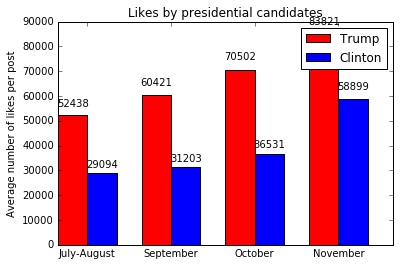

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 4
TrumpMeans = (tavl1, tavl2, tavl3, tavl4)

ind = np.arange(N)  
width = 0.35       

fig, ax = plt.subplots()
rects1 = ax.bar(ind, TrumpMeans, width, color='r')

ClintonMeans = (havl1, havl2, havl3, havl4)

rects2 = ax.bar(ind + width, ClintonMeans, width, color='b')


ax.set_ylabel('Average number of likes per post')
ax.set_title('Likes by presidential candidates')
ax.set_xticks(ind + width)
ax.set_xticklabels(('July-August', 'September', 'October', 'November'))

ax.legend((rects1[0], rects2[0]), ('Trump', 'Clinton'))


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

As the bar chart shows Donald Trump's posts have many more average likes at every interval. 

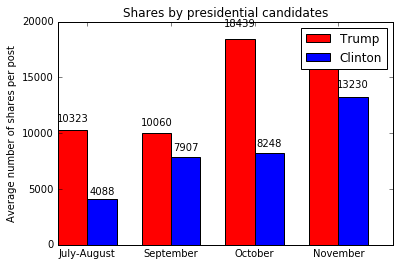

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 4
TrumpMeans = (tavs1, tavs2, tavs3, tavs4)


ind = np.arange(N) 
width = 0.35       

fig, ax = plt.subplots()
rects1 = ax.bar(ind, TrumpMeans, width, color='r')

ClintonMeans = (havs1, havs2, havs3, havs4)

rects2 = ax.bar(ind + width, ClintonMeans, width, color='b')


ax.set_ylabel('Average number of shares per post')
ax.set_title('Shares by presidential candidates')
ax.set_xticks(ind + width)
ax.set_xticklabels(('July-August', 'September', 'October', 'November'))

ax.legend((rects1[0], rects2[0]), ('Trump', 'Clinton'))


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

As the bar chart shows average number of shares of Trump's posts is bigger than Hillary's at every interval. 

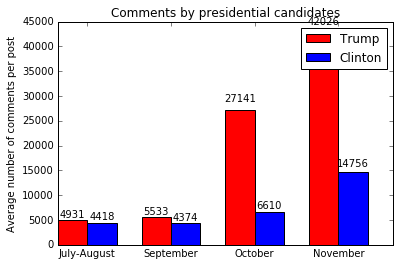

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 4
TrumpMeans = (tavc1, tavc2, tavc3, tavc4)


ind = np.arange(N) 
width = 0.35       

fig, ax = plt.subplots()
rects1 = ax.bar(ind, TrumpMeans, width, color='r')

ClintonMeans = (havc1, havc2, havc3, havc4)

rects2 = ax.bar(ind + width, ClintonMeans, width, color='b')


ax.set_ylabel('Average number of comments per post')
ax.set_title('Comments by presidential candidates')
ax.set_xticks(ind + width)
ax.set_xticklabels(('July-August', 'September', 'October', 'November'))

ax.legend((rects1[0], rects2[0]), ('Trump', 'Clinton'))


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

Finally the average comments per posts of the two candidates are really close to each other in the first and second interval.After average number of comments of Trump's posts went to the sky in October and November. This indicator of Trump's social media presence is almost ten times bigger in November than in July-August while in the case of Clinton it has just trippled.

Final thoughts
This simple analysis shows Trump dominated the Facebook at the observed interval. In every aspect of facebook popularity (comments,likes,shares) he defeated Hillary. If we take into consideration that Clinton's facebook page had about 9-10 million likes, Trumps's facebook page had 12-13 million likes, this difference doesn't explain the significant difference between likes,comments,shares. Trump was better in almost everything on Facebook and his dominance rose near to the election day. Much more people talked,liked,shared,commented about Trump. A semantic analysis would show the "mood" of these reactions, but we can say the hype around Trump on Facebook and in real life was tremendous. Negatively or positively he was mentioned a lot.